Problem
1. Construct and train CNN
2. Hyper-parameter tuning
3. Inference

Solution to construct and train CNN
*   Load and split MNIST data into training and testing set
*   resize images and conver label to even/odd (even:1, odd:0)
*   Build CNN model: two convolution layers with pooling, a dropout layer, and two fully connected layers.
*   Train the model and plot the results  


Epoch 1/5
860/860 [==============================] - 54s 63ms/step - loss: 0.1090 - accuracy: 0.9572 - val_loss: 0.0383 - val_accuracy: 0.9868
Epoch 2/5
860/860 [==============================] - 55s 64ms/step - loss: 0.0448 - accuracy: 0.9845 - val_loss: 0.0267 - val_accuracy: 0.9924
Epoch 3/5
860/860 [==============================] - 54s 63ms/step - loss: 0.0358 - accuracy: 0.9879 - val_loss: 0.0331 - val_accuracy: 0.9902
Epoch 4/5
860/860 [==============================] - 54s 63ms/step - loss: 0.0324 - accuracy: 0.9892 - val_loss: 0.0282 - val_accuracy: 0.9926
Epoch 5/5
860/860 [==============================] - 54s 63ms/step - loss: 0.0294 - accuracy: 0.9906 - val_loss: 0.0287 - val_accuracy: 0.9922


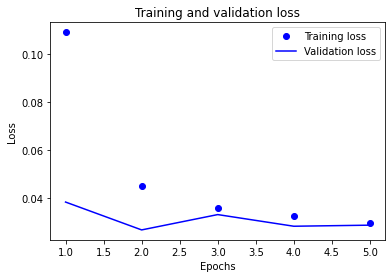

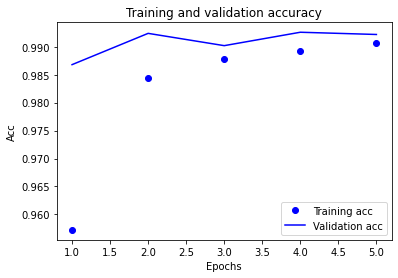

Final accuracy: 0.9906181693077087
Final loss: 0.029388096183538437
313/313 [==============================] - 3s 10ms/step - loss: 0.0197 - accuracy: 0.9941
Test accuracy: 0.9940999746322632
Test loss: 0.019679419696331024


In [149]:
# -*- coding: utf-8 -*-


import numpy as np
import keras
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers
from keras import models
import matplotlib.pyplot as plt
#Loading data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(60000,28,28,1)
train_images = train_images.astype('float32')/255
#Resize
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images.astype('float32')/255
#train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.08333, shuffle= True)
#Convert label to even/odd (even:0, odd:1)
train_labels = np.where(train_labels%2==0, 0, 1)
test_labels = np.where(test_labels%2==0, 0, 1)
#train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)
#Model building
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

#Model training
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])
ep = 5
history = model.fit(train_images, train_labels, epochs=ep, batch_size=64, validation_split=0.08333)
#Plot
history_dict = history.history
history_dict.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()
print("Final accuracy: " + str(acc[ep-1]))
print("Final loss: " + str(loss[ep-1]))

test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test accuracy: " + str(test_acc))
print("Test loss: " + str(test_loss))


Solution to hyper-parameter tuning
To compare results of different hyper-parameters, we can change one parameter while holding others.
*   By adding a convolution layer with pooling, model accuracy doesn't change.The test accuracy is decreased because of overfitting.
*   Adding a stride of size 2 is similar to maxpooling of size of 2. 
*   Increasing receptive field will reduce testing accuracy.
<br>Final accuracy: 0.9906181693077087
<br>Final loss: 0.029388096183538437
<br>Test accuracy: 0.9936000108718872
<br>Test loss: 0.01960783824324608
*   Changing dropout rate doesn't change the testing accuracy very much. 
*   Changing learning rate will reduce the accuracy of testing.
<br>Final accuracy: 0.9906181693077087
<br>Final loss: 0.029388096183538437
<br>Test accuracy: 0.9919000267982483
<br>Test loss: 0.027688659727573395
*   Increasing number of epochs could improve the model with a training time trade-off
<br>Final accuracy: 0.991527259349823
<br>Final loss: 0.026901710778474808
<br>Test accuracy: 0.9952999949455261
<br>Test loss: 0.016063401475548744
*   Adding batch Normalization increases testing accuracy
<br>Final accuracy: 0.9943090677261353
<br>Final loss: 0.019320709630846977
<br>est accuracy: 0.9943000078201294
<br>Test loss: 0.01899046264588833
*   Xavier initializer does improve the model
<br>Final accuracy: 0.9904545545578003
<br>Final loss: 0.028462309390306473
<br>Test accuracy: 0.9909999966621399
<br>Test loss: 0.028571374714374542
*   He initializer could improve the model
<br>Final accuracy: 0.9898363351821899
<br>Final loss: 0.030131418257951736
<br>Test accuracy: 0.9947999715805054
<br>Test loss: 0.017540622502565384
<br>
Based on the hyper-parameter tuning result, we can choose to use batch normalization and He initializer. Also we can increase the number of epochs.
New model result:
<br>Final accuracy: 0.9951817989349365
<br>Final loss: 0.014911566860973835
<br>Test accuracy: 0.9952999949455261
<br>Test loss: 0.016596101224422455
 

In [169]:
# -*- coding: utf-8 -*-


import numpy as np
import keras
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers
from keras import models
import matplotlib.pyplot as plt
#Loading data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(60000,28,28,1)
train_images = train_images.astype('float32')/255
#Resize
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images.astype('float32')/255
#Convert label to even/odd (even:0, odd:1)
train_labels = np.where(train_labels%2==0, 0, 1)
test_labels = np.where(test_labels%2==0, 0, 1)

#Model building
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.BatchNormalization())

model.add(layers.Dropout(0.5))
#model.add(layers.BatchNormalization())
model.add(layers.Flatten())
#xavier initializer
#initializer = keras.initializers.GlorotNormal()
#he initializer
initializer = keras.initializers.HeNormal
model.add(layers.Dense(500, activation='relu', kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))
#opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])
ep = 5
history = model.fit(train_images, train_labels, epochs=ep, batch_size=64, validation_split=0.083333)
history_dict = history.history
history_dict.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
print("Final accuracy: " + str(acc[ep-1]))
print("Final loss: " + str(loss[ep-1]))
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test accuracy: " + str(test_acc))
print("Test loss: " + str(test_loss))



Epoch 1/5
860/860 [==============================] - 53s 62ms/step - loss: 0.0990 - accuracy: 0.9636 - val_loss: 0.0451 - val_accuracy: 0.9858
Epoch 2/5
860/860 [==============================] - 53s 62ms/step - loss: 0.0453 - accuracy: 0.9845 - val_loss: 0.0298 - val_accuracy: 0.9908
Epoch 3/5
860/860 [==============================] - 57s 66ms/step - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.0226 - val_accuracy: 0.9938
Epoch 4/5
860/860 [==============================] - 53s 61ms/step - loss: 0.0314 - accuracy: 0.9892 - val_loss: 0.0236 - val_accuracy: 0.9912
Epoch 5/5
860/860 [==============================] - 53s 61ms/step - loss: 0.0270 - accuracy: 0.9910 - val_loss: 0.0269 - val_accuracy: 0.9914
Final accuracy: 0.9909636378288269
Final loss: 0.02695493772625923
313/313 [==============================] - 3s 11ms/step - loss: 0.0223 - accuracy: 0.9928
Test accuracy: 0.9927999973297119
Test loss: 0.022263193503022194


Inference
*    Load test image as greyscale
*    Convert image to MNIST data format by using adaptive threshold
*    Reshape and normalize image to fit the model input
*    Predict the class label using the pretrained model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


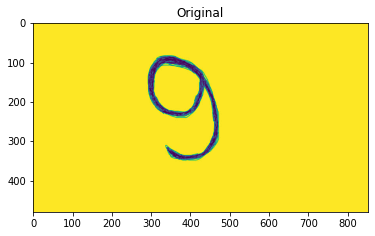

Odd


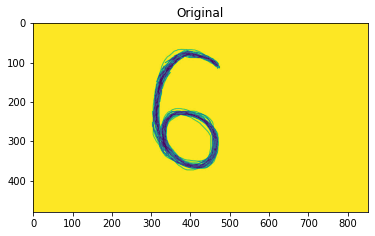

Even Number


In [170]:
import cv2
from google.colab import drive
import matplotlib.pyplot as plt
def display(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.show()

#read image
drive.mount('/content/drive')
test = cv2.imread('drive/My Drive/Colab Notebooks/test1.jpg',0) 
display(test)
#test = cv2.medianBlur(test,3)
test = cv2.adaptiveThreshold(test,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
test = cv2.resize(255-test, (28,28),interpolation = cv2.INTER_AREA)

test = keras.preprocessing.image.img_to_array(test)
test = test.reshape(1,28,28,1)
test = np.array(test,dtype="float")/255.0

testResult = model.predict_classes(test)
print("Even" if(testResult==0) else"Odd")
test = cv2.imread('drive/My Drive/Colab Notebooks/test6.jpg',0) 
display(test)
#test = cv2.medianBlur(test,3)
test = cv2.adaptiveThreshold(test,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
test = cv2.resize(255-test, (28,28),interpolation = cv2.INTER_AREA)

test = keras.preprocessing.image.img_to_array(test)
test = test.reshape(1,28,28,1)
test = np.array(test,dtype="float")/255.0

testResult = model.predict_classes(test)
print("Even Number" if(testResult==0) else "Odd Number")
#print(np.argmax(testResult, axis=1))